In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

# **Data Gathering**

In [24]:
import sklearn

In [27]:
%matplotlib inline

In [3]:
# Gathering the Boston data from the Stat CMU website
response= requests.get('http://lib.stat.cmu.edu/datasets/boston')
response

<Response [200]>

In [4]:
# Storing the data in the local harddrive
my_folder = r'C:\Users\srini\OneDrive\Documents\Udacity'
file_name = 'boston_dataset.txt'

with open(os.path.join(my_folder,file_name), 'wb' ) as file:
    file.write(response.content)

In [5]:
# Estimating the number of rows in the dataset which will be useful for inputting as a dataframe
my_text= str(response.content)
my_text.count('\\n')

1034

**The columns in the dataset** <br>
CRIM     per capita crime rate by town <br> 
ZN       proportion of residential land zoned for lots over 25,000 sq.ft. <br> 
INDUS    proportion of non-retail business acres per town <br> 
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) <br> 
NOX      nitric oxides concentration (parts per 10 million) <br> 
RM       average number of rooms per dwelling<br> 
AGE      proportion of owner-occupied units built prior to 1940<br> 
DIS      weighted distances to five Boston employment centres<br> 
RAD      index of accessibility to radial highways<br> 
TAX      full-value property-tax rate per 10000 <br> 
PTRATIO  pupil-teacher ratio by town <br> 
B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town <br> 
LSTAT    percent lower status of the population <br> 
MEDV     Median value of owner-occupied homes in 1000's<br> 

In [6]:
# Setting up the column name
my_col_name = ['crime', 'zone', 'industrial', 'chas_river', 'nox', 'avg_room', 'age_house', 'distance', 'radial', 'tax',\
               'pupil_teacher', 'blacks', 'lstat', 'value_home' ]

In [7]:
boston1= pd.read_csv(os.path.join(my_folder,file_name), sep= '\t')
boston1.head(15)
# The first 20 lines are the introductory note in the dataset and the the description for the columns

boston1.head(25).tail(5)
# It seems that there are 11 columns in 1 row and the next 3 columns in the subsequent row.

,"The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic"
20,396.90 4.98 24.00
21,0.02731 0.00 7.070 0 0.4690 6.4210 78...
22,396.90 9.14 21.60
23,0.02729 0.00 7.070 0 0.4690 7.1850 61...
24,392.83 4.03 34.70


In [8]:
# Reading the locally stored file. Since the data has 11 columns in 1 row and the next 3 columns in the subsequent row,
# we need to extract data as 2 seperate dataframes and merge them later

boston1= pd.read_csv(os.path.join(my_folder,file_name),delim_whitespace= True, index_col= False, \
            skiprows= list(np.arange(21))+list(np.arange(21,1031,2)),\
                     engine= 'python',header= None, names = my_col_name[:-3])

boston2= pd.read_csv(os.path.join(my_folder,file_name),delim_whitespace= True, index_col= False, \
            skiprows= list(np.arange(22))+list(np.arange(22,1031,2)),\
                     engine= 'python',header= None, names = my_col_name[-3:])

print(boston1.head(2))
print(boston2.head(2))

     crime  zone  industrial  chas_river    nox  avg_room  age_house  \
0  0.00632  18.0        2.31         0.0  0.538     6.575       65.2   
1  0.02731   0.0        7.07         0.0  0.469     6.421       78.9   

   distance  radial    tax  pupil_teacher  
0    4.0900     1.0  296.0           15.3  
1    4.9671     2.0  242.0           17.8  
   blacks  lstat  value_home
0   396.9   4.98        24.0
1   396.9   9.14        21.6


In [9]:
# Joining both the datasets together to form a tidy dataframe
boston = boston1.join(boston2, )
boston.head()

,crime,zone,industrial,chas_river,nox,avg_room,age_house,distance,radial,tax,pupil_teacher,blacks,lstat,value_home
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# **Data Wrangling**

In [10]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 14 columns):
crime            508 non-null float64
zone             508 non-null float64
industrial       508 non-null float64
chas_river       506 non-null float64
nox              506 non-null float64
avg_room         506 non-null float64
age_house        506 non-null float64
distance         506 non-null float64
radial           506 non-null float64
tax              506 non-null float64
pupil_teacher    506 non-null float64
blacks           507 non-null float64
lstat            507 non-null float64
value_home       507 non-null float64
dtypes: float64(14)
memory usage: 55.7 KB


In [11]:
boston.describe()

,crime,zone,industrial,chas_river,nox,avg_room,age_house,distance,radial,tax,pupil_teacher,blacks,lstat,value_home
count,508.000000,508.000000,508.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,507.000000,507.000000,507.000000
mean,5.155104,11.347165,11.159665,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,355.970626,12.628107,22.511893
std,26.002682,23.277925,6.863830,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,92.569615,7.156099,9.200070
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.047410,0.000000,5.000000
25%,0.082155,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.270000,6.925000,16.900000
50%,0.260420,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.430000,11.340000,21.200000
75%,3.694070,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.220000,16.950000,25.000000
max,396.900000,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### **Missing data**


In [37]:
# Value of house
boston[boston['value_home'].isna()]

,crime,zone,industrial,chas_river,nox,avg_room,age_house,distance,radial,tax,pupil_teacher,blacks,lstat,value_home
507,396.9,7.88,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
boston.head()

,crime,zone,industrial,chas_river,nox,avg_room,age_house,distance,radial,tax,pupil_teacher,blacks,lstat,value_home
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [36]:
boston.iloc[500:,]

,crime,zone,industrial,chas_river,nox,avg_room,age_house,distance,radial,tax,pupil_teacher,blacks,lstat,value_home
500,0.22438,0.00,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90000,14.33,16.80
501,0.06263,0.00,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99000,9.67,22.40
502,0.04527,0.00,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90000,9.08,20.60
503,0.06076,0.00,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90000,5.64,23.90
504,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45000,6.48,22.00
505,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04741,0.00,11.93
506,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90000,7.88,11.90
507,396.90000,7.88,11.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There seems to be missing value in the row 505 and 507. This is probably because the dataset wasnt joined properly. We will delete those two rows as they are duplicate rows.

In [39]:
boston.drop(index= [505,507], inplace= True)
boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 506
Data columns (total 14 columns):
crime            506 non-null float64
zone             506 non-null float64
industrial       506 non-null float64
chas_river       506 non-null category
nox              506 non-null float64
avg_room         506 non-null float64
age_house        506 non-null float64
distance         506 non-null float64
radial           506 non-null float64
tax              506 non-null float64
pupil_teacher    506 non-null float64
blacks           506 non-null float64
lstat            506 non-null float64
value_home       506 non-null float64
dtypes: category(1), float64(13)
memory usage: 55.9 KB


In [40]:
boston.tail(7)

,crime,zone,industrial,chas_river,nox,avg_room,age_house,distance,radial,tax,pupil_teacher,blacks,lstat,value_home
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
506,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [12]:
# Changing the River data type to categorical values
boston['chas_river']= boston['chas_river'].astype('category')

## **Exploratory Data Analysis**

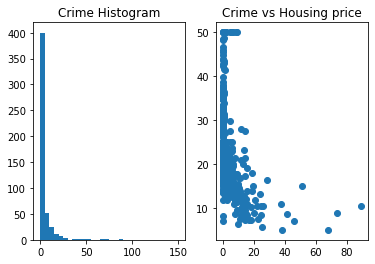

In [64]:
# histogram for crime
plt.subplot(1,2,1, )
plt.hist(boston['crime'], bins= 30, range= (0,150) )
plt.title('Crime Histogram')
plt.subplot(1,2,2)
plt.scatter(boston.crime, boston.value_home)
plt.title('Crime vs Housing price')
plt.show()

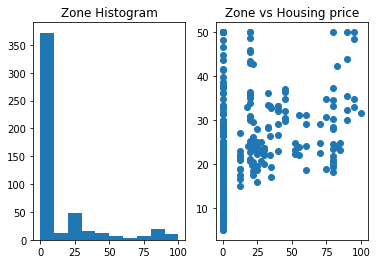

In [66]:
# histogram for the zone
plt.subplot(1,2,1, )
plt.hist(boston['zone'])
plt.title('Zone Histogram')
plt.subplot(1,2,2)
plt.scatter(boston.zone, boston.value_home)
plt.title('Zone vs Housing price')
plt.show()

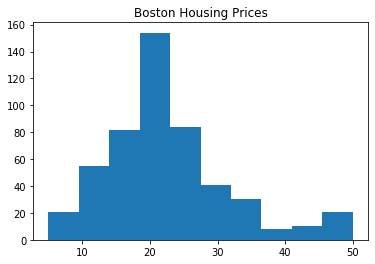

In [46]:
# Histogram for the value of houses
plt.hist(boston.value_home)
plt.title('Boston Housing Prices')
plt.show()

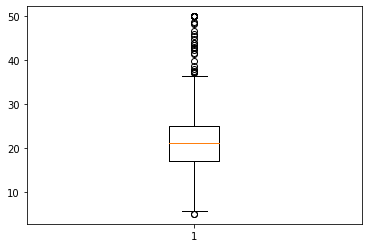

In [49]:
plt.boxplot(boston.value_home)
plt.show()

# The median housing prices seem to be capped at $50,000.

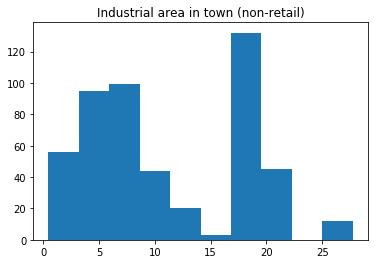

In [51]:
# Histogram for the industrial area in the zone
plt.hist(boston.industrial)
plt.title('Industrial area in town (non-retail)')
plt.show()